#### Importing odules and reading the data.

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

In [2]:
data = pd.read_excel("Womens Clothing Reviews Data.xlsx",sheet_name=0)
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


#### Preliminary data exploration:

###### 1. Shape of data:

In [3]:
data.shape

(23486, 11)

###### 2. Data types and counts (missing values).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
for i in data.columns:
    data.rename(columns={i:i.lower().replace(' ','_')},inplace=True)

data.columns

Index(['product_id', 'category', 'subcategory1', 'subcategory2', 'location',
       'channel', 'customer_age', 'review_title', 'review_text', 'rating',
       'recommend_flag'],
      dtype='object')

#### Primary exploratory analysis:

###### 1. Customer age and rating/recommendation flag.

,customer_age,rating
0,43.693587,1
1,42.622364,2
2,42.158481,3
3,42.887532,4
4,43.583124,5


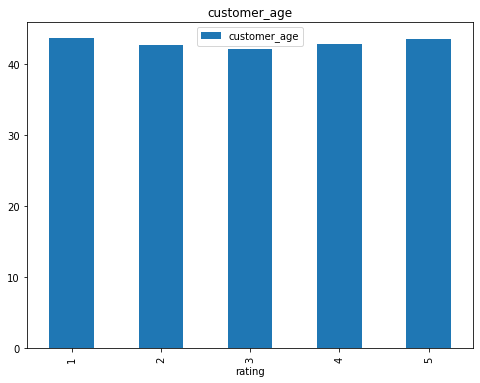

In [6]:
age_rating = data.groupby('rating',as_index=False).mean()[['customer_age','rating']]
age_rating.plot(kind='bar', x = 'rating', subplots=True, figsize=(8,6));
age_rating

,customer_age,recommend_flag
0,42.389501,0
1,43.373304,1


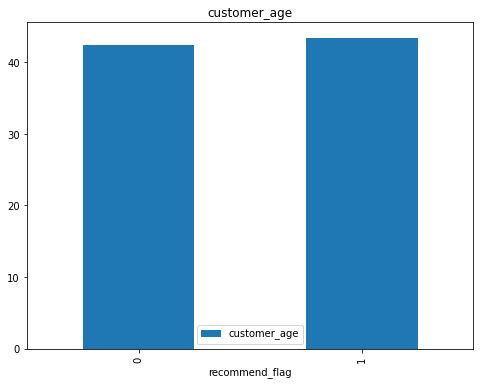

In [7]:
age_rating = data.groupby('recommend_flag',as_index=False).mean()[['customer_age','recommend_flag']]
age_rating.plot(kind='bar', x = 'recommend_flag', subplots=True, figsize=(8,6));
age_rating

We see that there seems to be no significant difference between the ratings and recommendations based on customer ages.

###### 2. Channels and ratings/recommendations.

,recommend_flag,rating,channel
0,0.826012,4.215389,Mobile
1,0.819701,4.181919,Web


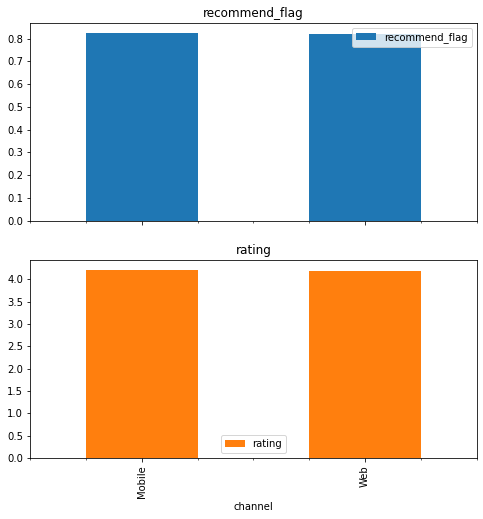

In [8]:
channel_rating = data.groupby('channel',as_index=False).mean()[['recommend_flag','rating','channel']]
channel_rating.plot(kind='bar', x = 'channel', subplots=True, figsize=(8,8));
channel_rating

We see no significant difference in the average rating and recommendation proportion based on channel.

###### Categories and subcategories.

,recommend_flag,rating,category
0,0.816823,4.176606,General
1,0.825985,4.211084,General Petite
2,0.852197,4.286285,Initmates


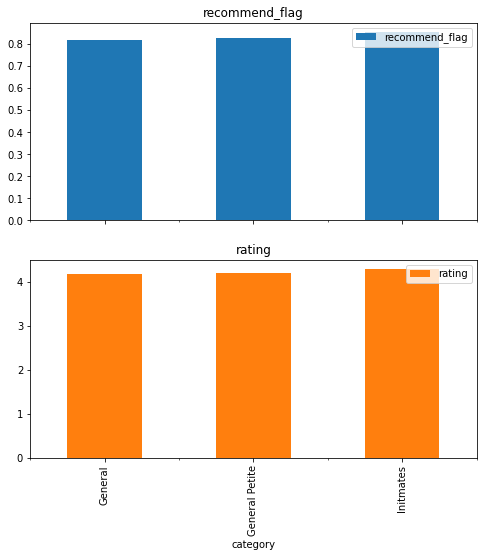

In [9]:
category_rating = data.groupby('category',as_index=False).mean()[['recommend_flag','rating','category']]
category_rating.plot(kind='bar', x = 'category', subplots=True, figsize=(8,8));
category_rating

,recommend_flag,rating,subcategory1
0,0.851277,4.288760,Bottoms
1,0.808197,4.150815,Dresses
2,0.850144,4.280115,Intimate
3,0.836240,4.264535,Jackets
4,0.815151,4.172239,Tops
5,0.739496,3.815126,Trend


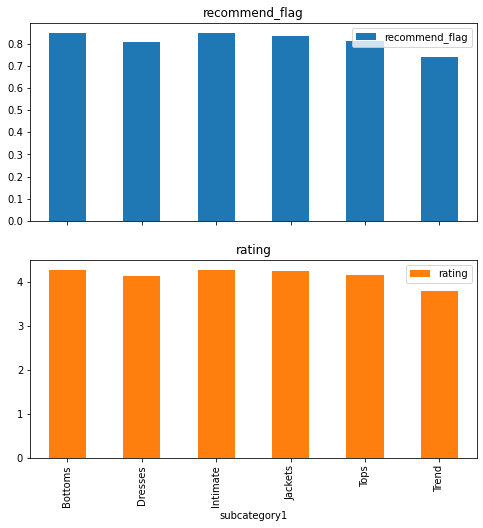

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

subcategory1_rating = data.groupby('subcategory1',as_index=False).mean()[['recommend_flag','rating','subcategory1']]
subcategory1_rating.plot(kind='bar', x = 'subcategory1', subplots=True, figsize=(8,8));
subcategory1_rating

,recommend_flag,rating,subcategory2
0,0.810139,4.154020,Blouses
1,1.000000,4.500000,Casual bottoms
2,1.000000,4.000000,Chemises
3,0.808197,4.150815,Dresses
4,0.837273,4.260909,Fine gauge
5,0.857143,4.279221,Intimates
6,0.845170,4.295455,Jackets
7,0.881430,4.360942,Jeans
8,0.817675,4.161677,Knits
9,0.883562,4.376712,Layering


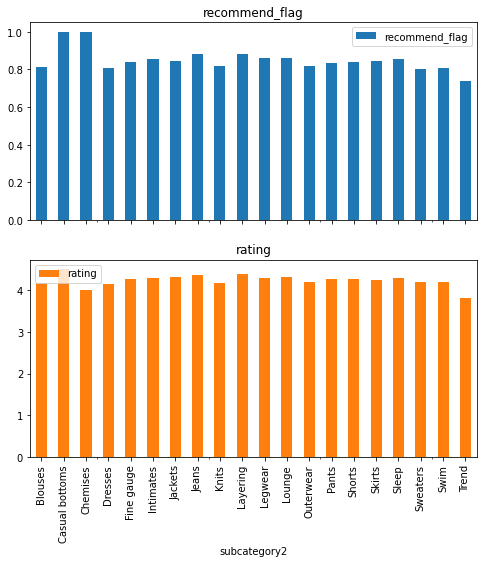

In [11]:
subcategory2_rating = data.groupby('subcategory2',as_index=False).mean()[['recommend_flag','rating','subcategory2']]
subcategory2_rating.plot(kind='bar', x = 'subcategory2', subplots=True, figsize=(8,8));
subcategory2_rating

In [12]:
subcat2 = data.groupby('subcategory2').count()[['product_id']]

In [13]:
subcat2.sort_values('product_id')

,product_id
subcategory2,
Chemises,1
Casual bottoms,2
Trend,119
Layering,146
Intimates,154
Legwear,165
Sleep,228
Shorts,317
Outerwear,328


We see that while the categories are mostly similarly distributed, the subcategories see the 'trend' subcategory being markedly worse than the others, with 'chemises' and 'casual bottoms' both having a 100% recommendation rate. However, based on the table above it is apparent that this is due to the small sample size as these are the 3 subcategories with the lowest volume.

#### Secondary Exploratory Analysis - Text Analysis

###### 1. Importing NLTK.

In [14]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91953\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df = data.dropna(subset=['review_text']).drop('review_title',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      22641 non-null  int64 
 1   category        22628 non-null  object
 2   subcategory1    22628 non-null  object
 3   subcategory2    22628 non-null  object
 4   location        22641 non-null  object
 5   channel         22641 non-null  object
 6   customer_age    22641 non-null  int64 
 7   review_text     22641 non-null  object
 8   rating          22641 non-null  int64 
 9   recommend_flag  22641 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


In [16]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

df['review_text'] = df['review_text'].apply(lambda x: clean_text(x))
df.head()

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,review_text,rating,recommend_flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,absolutely wonderful silky and sexy and comfo...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,love this dress its sooo pretty i happened t...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,i had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,i love love love this jumpsuit its fun flirty ...,5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,this shirt is very flattering to all due to th...,5,1


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text_no_sw'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df[['review_text','text_no_sw']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91953\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_text,text_no_sw
0,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable
1,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...
2,i had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...
4,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...


In [18]:
df['text_tokenized'] = df['text_no_sw'].apply(lambda x: word_tokenize(x))
df[['review_text','text_tokenized']].head()

,review_text,text_tokenized
0,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, sexy, comfortable]"
1,love this dress its sooo pretty i happened t...,"[love, dress, sooo, pretty, happened, find, st..."
2,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini..."
3,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti..."


In [19]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
df['text_lem'] = df['text_tokenized'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

df[['review_text','text_tokenized','text_lem']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91953\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91953\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review_text,text_tokenized,text_lem
0,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,love this dress its sooo pretty i happened t...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happened, find, st..."
2,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, wanted, work, init..."
3,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti...","[shirt, flattering, due, adjustable, front, ti..."


In [20]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

df['text_lem'] = df['text_tokenized'].apply(lambda x: [token.lemma_ for token in nlp(' '.join(x))])
df[['review_text','text_tokenized','text_lem']].head()

,review_text,text_tokenized,text_lem
0,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,love this dress its sooo pretty i happened t...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor..."
2,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, really, want, work, initia..."
3,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti...","[shirt, flatter, due, adjustable, front, tie, ..."


In [21]:
from gensim.models.phrases import Phrases, Phraser

D:\Applications\conda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [22]:
sent = [cell for cell in df['text_lem']]
phrases = Phrases(sent)

In [23]:
bigrams = Phraser(phrases)
sentences = bigrams[sent]

In [24]:
text = []
for i in sentences:
    temp = []
    for j in i:
        if 'I' not in j:
            temp.append(j.replace('_',' '))
    text.append(temp)
    
df['text_phrases'] = text

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      22641 non-null  int64 
 1   category        22628 non-null  object
 2   subcategory1    22628 non-null  object
 3   subcategory2    22628 non-null  object
 4   location        22641 non-null  object
 5   channel         22641 non-null  object
 6   customer_age    22641 non-null  int64 
 7   review_text     22641 non-null  object
 8   rating          22641 non-null  int64 
 9   recommend_flag  22641 non-null  int64 
 10  text_no_sw      22641 non-null  object
 11  text_tokenized  22641 non-null  object
 12  text_lem        22641 non-null  object
 13  text_phrases    22641 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.6+ MB


##### We will now create a sentiment value. We will compare nltk's sentiment intensity analyzer and textblob's polarity score to determine which is the best one.

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91953\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
senti = SentimentIntensityAnalyzer()

def nltk_sentiment(x):
    a=0
    for i in x:
        a+=senti.polarity_scores(i)['compound']
    return a

In [29]:
df['nltk_s'] = df.apply(lambda x: senti.polarity_scores(x.review_text)['compound'], axis=1)

In [30]:
from textblob import TextBlob

In [31]:
def tb_sentiment(x):
    a=0
    for i in x:
        a+= TextBlob(i).sentiment.polarity
    return a

In [32]:
df['tb_s'] = df.apply(lambda x: TextBlob(x.review_text).sentiment.polarity, axis=1)

In [33]:
test = df[['rating','recommend_flag','tb_s','nltk_s']]
test.describe()

,rating,recommend_flag,tb_s,nltk_s
count,22641.000000,22641.000000,22641.000000,22641.000000
mean,4.183561,0.818868,0.241503,0.729767
std,1.115762,0.385136,0.169770,0.372461
min,1.000000,0.000000,-0.975000,-0.956300
25%,4.000000,1.000000,0.135859,0.700300
50%,5.000000,1.000000,0.233333,0.884700
75%,5.000000,1.000000,0.339583,0.947700
max,5.000000,1.000000,1.000000,0.995900


In [34]:
test.corr()

,rating,recommend_flag,tb_s,nltk_s
rating,1.000000,0.792568,0.376201,0.458155
recommend_flag,0.792568,1.000000,0.312985,0.419748
tb_s,0.376201,0.312985,1.000000,0.448062
nltk_s,0.458155,0.419748,0.448062,1.000000


In [35]:
test[test['recommend_flag']==0].describe()

,rating,recommend_flag,tb_s,nltk_s
count,4101.000000,4101.0,4101.000000,4101.000000
mean,2.303341,0.0,0.128528,0.397360
std,0.847470,0.0,0.166558,0.531117
min,1.000000,0.0,-0.975000,-0.956300
25%,2.000000,0.0,0.034568,0.025800
50%,2.000000,0.0,0.129861,0.584400
75%,3.000000,0.0,0.225843,0.846000
max,5.000000,0.0,0.910000,0.988800


In [36]:
test[test['recommend_flag']==1].describe()

,rating,recommend_flag,tb_s,nltk_s
count,18540.000000,18540.0,18540.000000,18540.000000
mean,4.599461,1.0,0.266493,0.803295
std,0.637552,0.0,0.160045,0.277815
min,1.000000,1.0,-0.700000,-0.941600
25%,4.000000,1.0,0.161344,0.785400
50%,5.000000,1.0,0.254040,0.905200
75%,5.000000,1.0,0.358333,0.953800
max,5.000000,1.0,1.000000,0.995900


Here, we can see that in general, the textblob algorithm is much better at detecting positive sentiments, and the nltk algorithm is much better at detecting positive sentiment.

So we will use both algorithms, accordingly.

In [37]:
df['sentiment'] = df.apply(lambda x: x.tb_s if x.recommend_flag == 0 else x.nltk_s, axis=1)

In [38]:
test['sentiment'] = df['sentiment']
test.corr()

<ipython-input-38-764692d057d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentiment'] = df['sentiment']


,rating,recommend_flag,tb_s,nltk_s,sentiment
rating,1.000000,0.792568,0.376201,0.458155,0.658996
recommend_flag,0.792568,1.000000,0.312985,0.419748,0.705311
tb_s,0.376201,0.312985,1.000000,0.448062,0.497675
nltk_s,0.458155,0.419748,0.448062,1.000000,0.812880
sentiment,0.658996,0.705311,0.497675,0.812880,1.000000


In [39]:
dfNew = df.drop(columns=['text_no_sw','text_tokenized','text_lem','nltk_s','tb_s'])
dfNew.reset_index(drop=True, inplace=True)

In [40]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      22641 non-null  int64  
 1   category        22628 non-null  object 
 2   subcategory1    22628 non-null  object 
 3   subcategory2    22628 non-null  object 
 4   location        22641 non-null  object 
 5   channel         22641 non-null  object 
 6   customer_age    22641 non-null  int64  
 7   review_text     22641 non-null  object 
 8   rating          22641 non-null  int64  
 9   recommend_flag  22641 non-null  int64  
 10  text_phrases    22641 non-null  object 
 11  sentiment       22641 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.1+ MB


#### Exploring the new sentiment data.

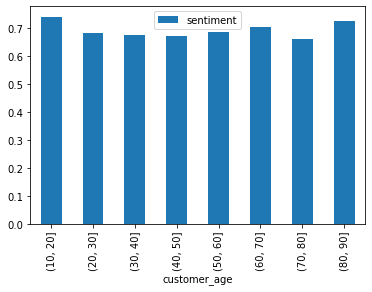

In [41]:
dfNew.groupby(pd.cut(dfNew['customer_age'], np.arange(10,100,10))).mean()[['sentiment']].plot(kind='bar');

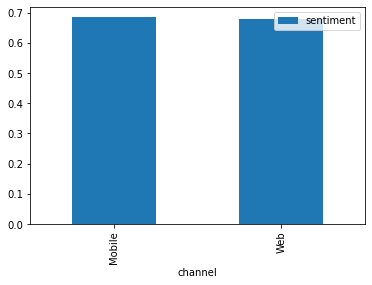

In [42]:
dfNew.groupby('channel').mean()[['sentiment']].plot(kind='bar');

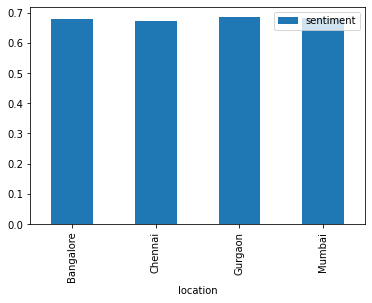

In [43]:
dfNew.groupby('location').mean()[['sentiment']].plot(kind='bar');

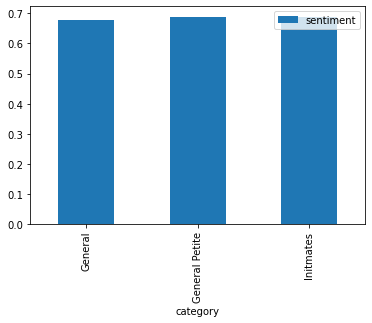

In [44]:
dfNew.groupby('category').mean()[['sentiment']].plot(kind='bar');

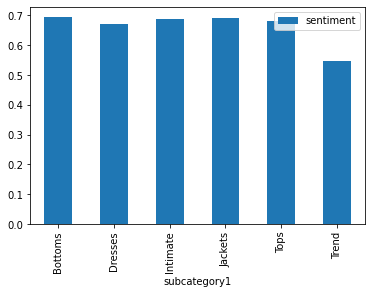

In [45]:
dfNew.groupby('subcategory1').mean()[['sentiment']].plot(kind='bar');

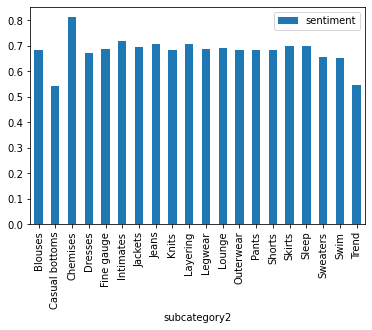

In [46]:
dfNew.groupby('subcategory2').mean()[['sentiment']].plot(kind='bar');

#### Frequency Plots:

##### 1. Positive sentiments:

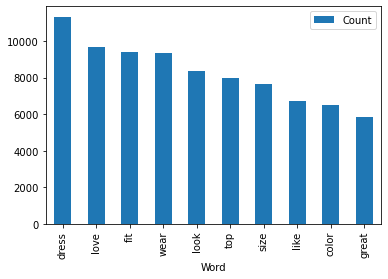

In [47]:
temp = dfNew[dfNew['sentiment']>=0]
x = []
for a in temp['text_phrases']:
    for i in a:
        x.append(i)
        
word_dist = FreqDist(x)
pd.DataFrame(word_dist.most_common(10),columns=['Word','Count']).plot(kind='bar',x='Word');

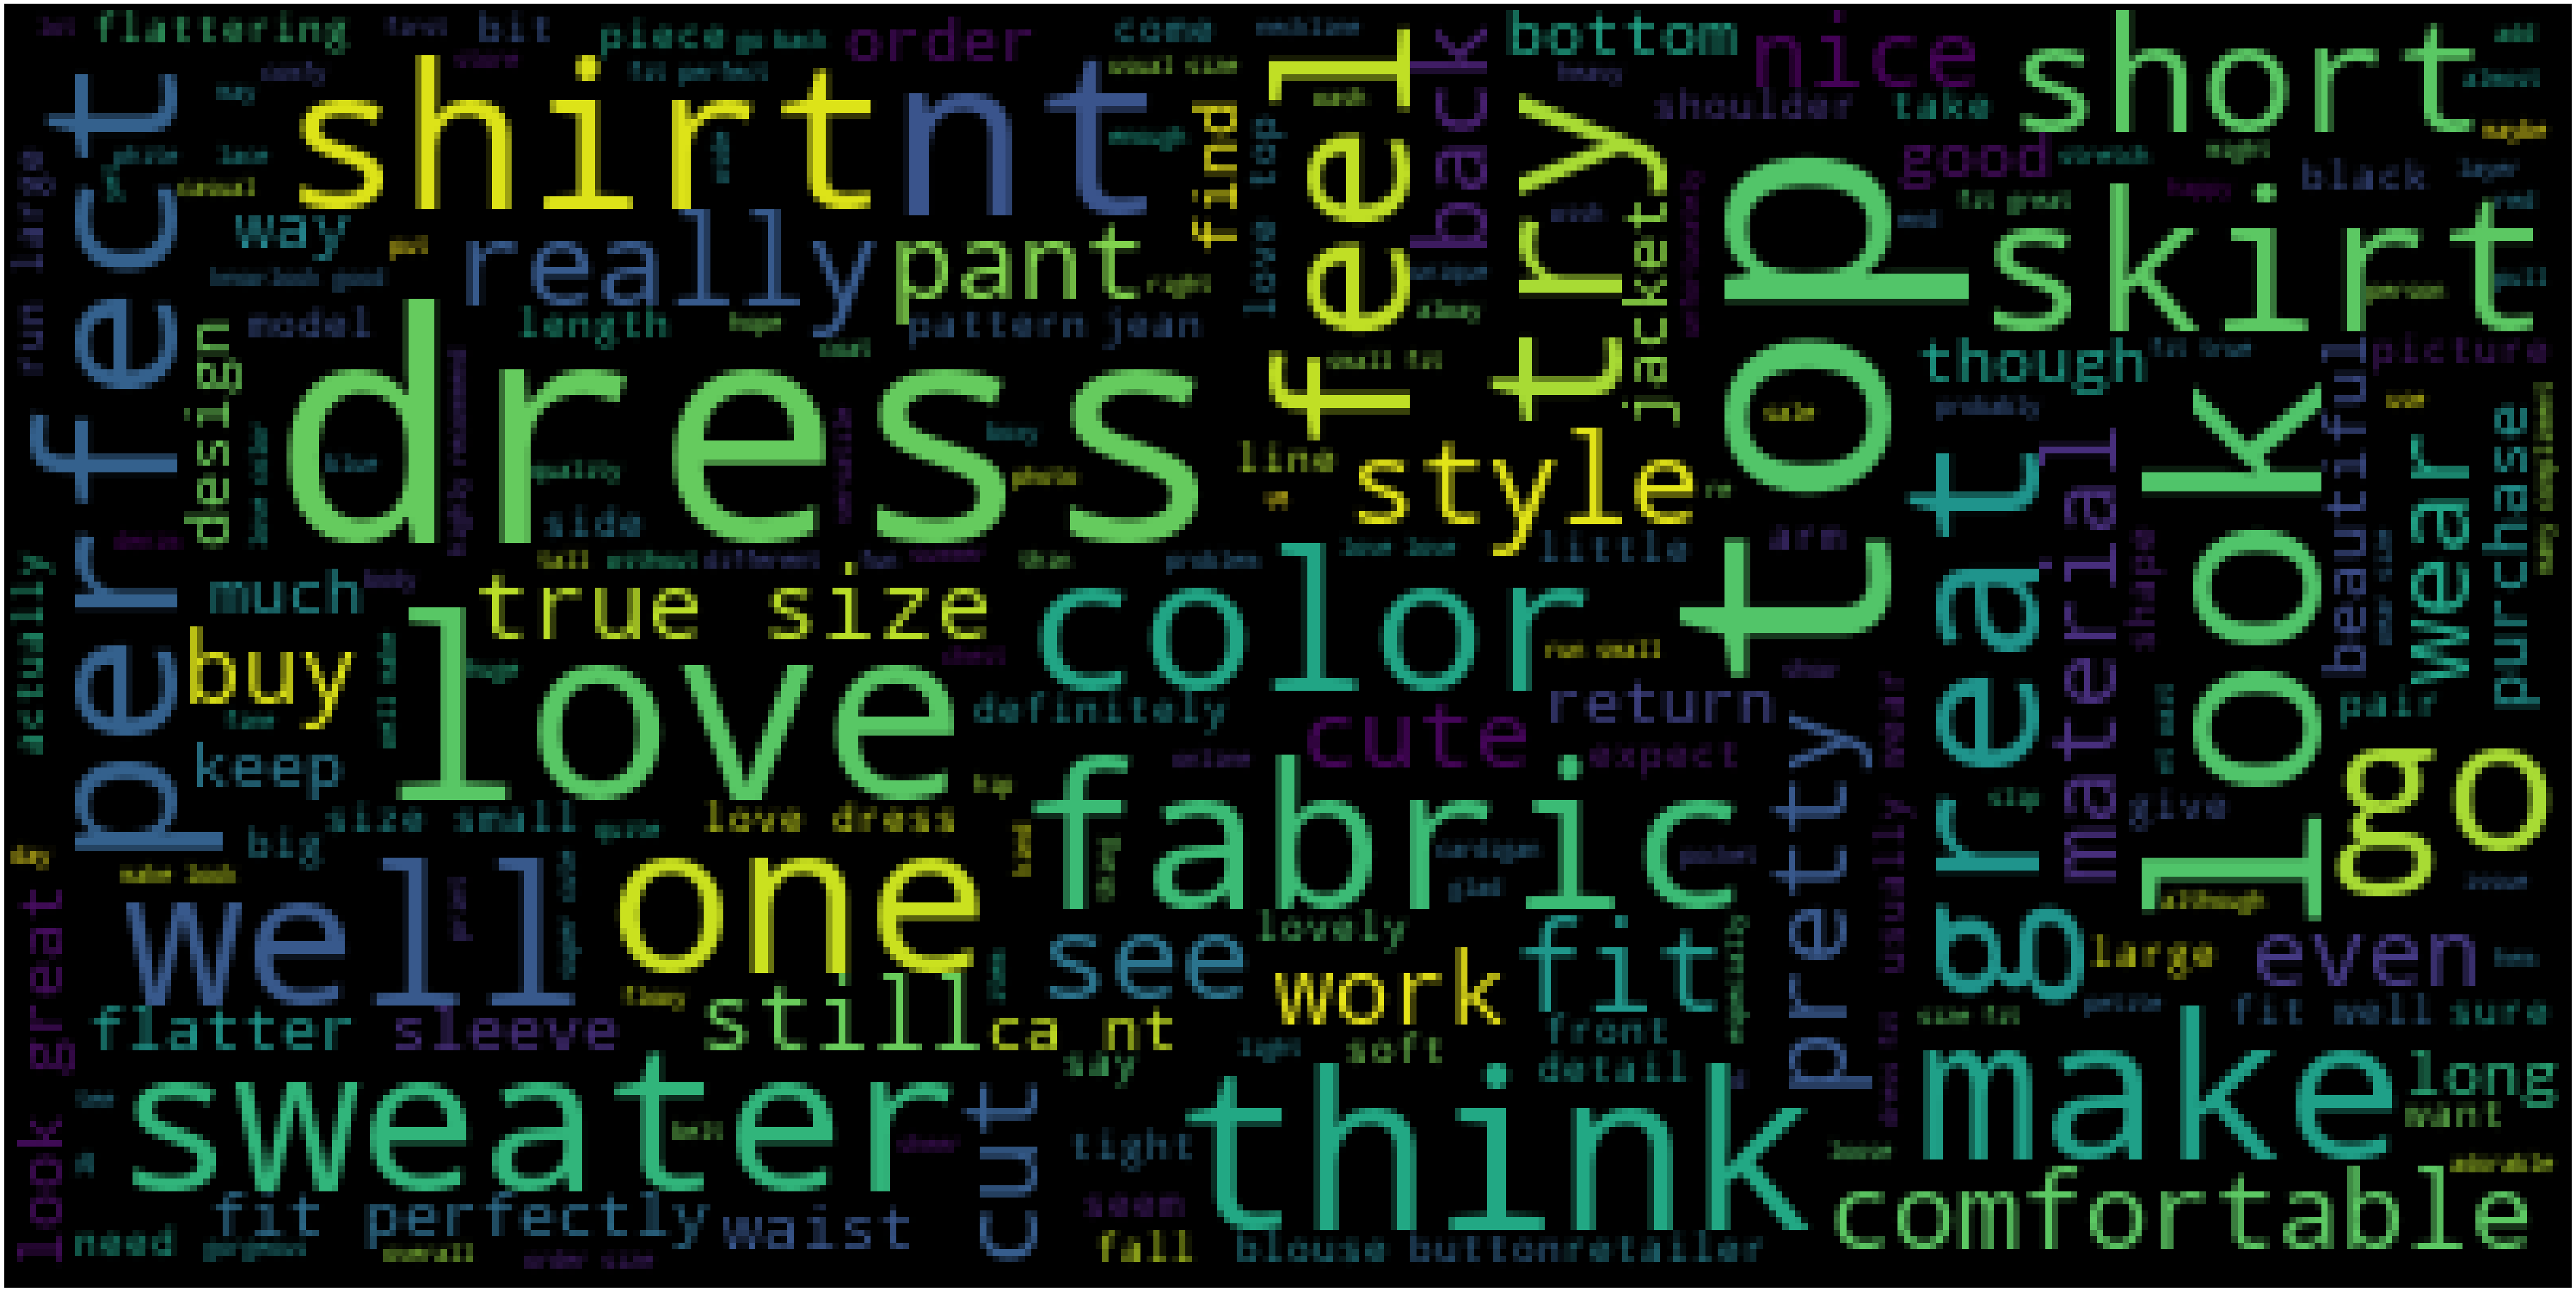

In [48]:
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (75,75))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    
wc(x,'black','Most Used Words')

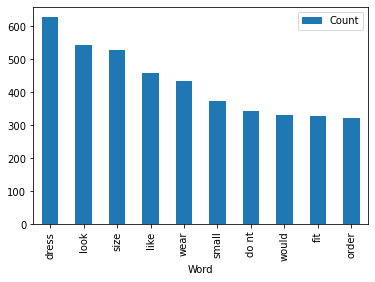

In [49]:
temp = dfNew[dfNew['sentiment']<0]
x = []
for a in temp['text_phrases']:
    for i in a:
        x.append(i)
        
word_dist = FreqDist(x)
pd.DataFrame(word_dist.most_common(10),columns=['Word','Count']).plot(kind='bar',x='Word');

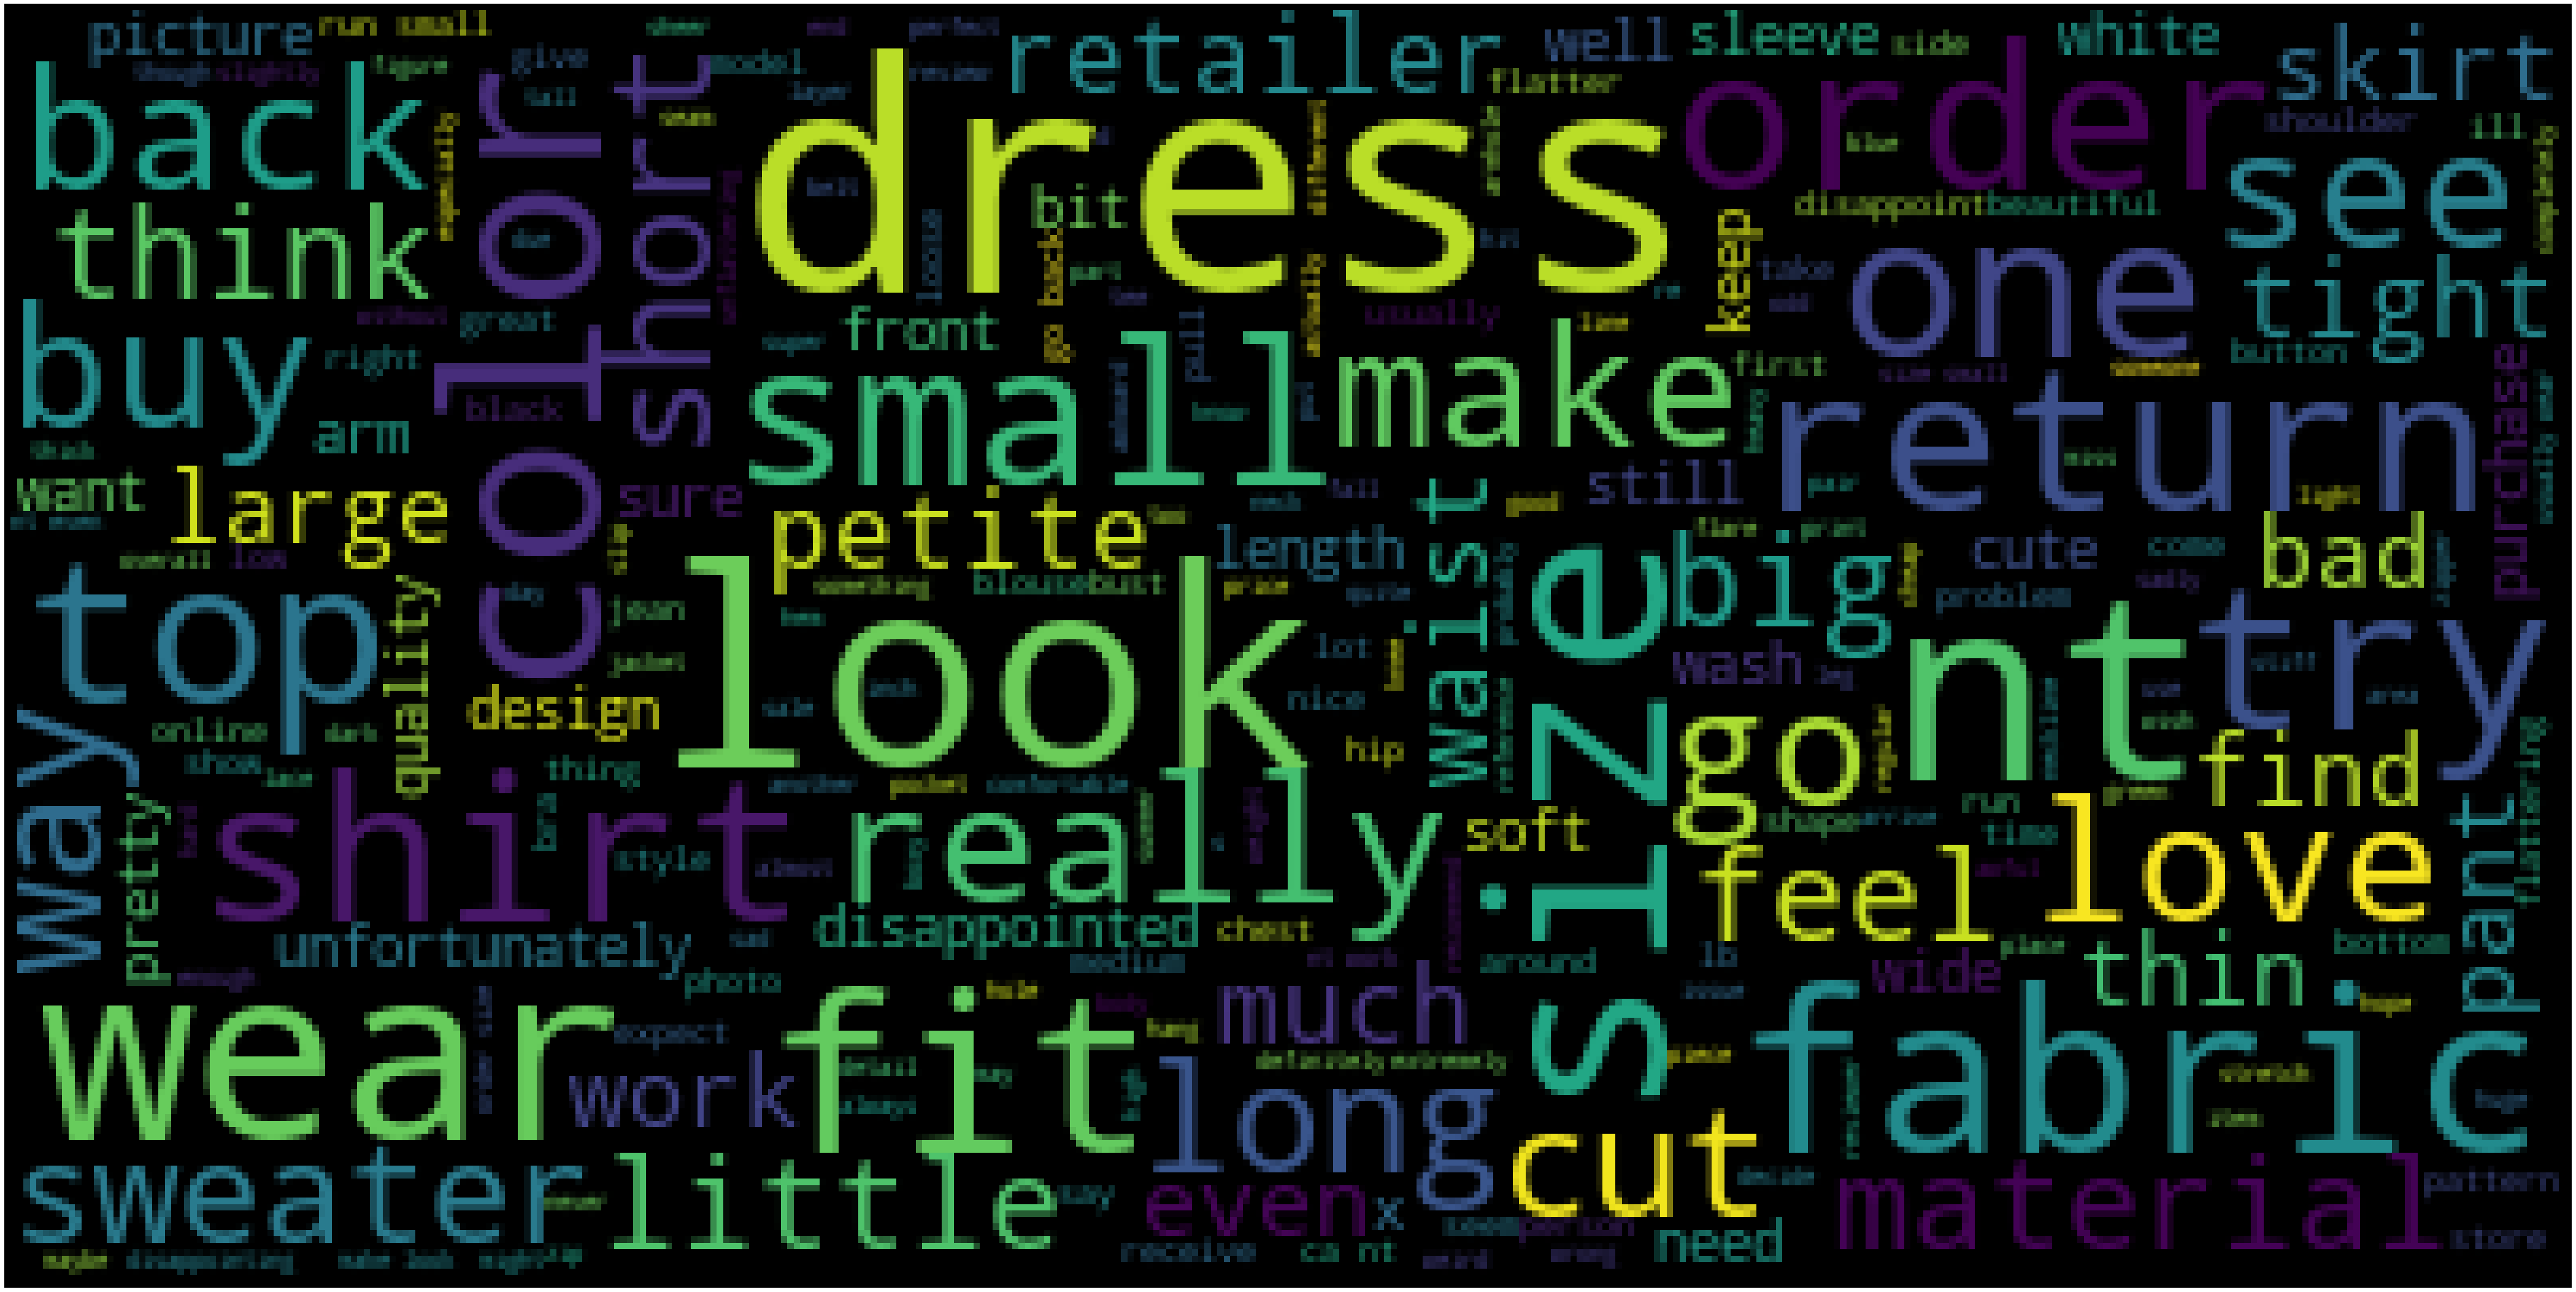

In [50]:
wc(x,'black','Most Used Words')

### Predictive Modelling: Predicting rating and recommendation flag using the review:

In [51]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = df[['text_phrases']]

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words, analyzer=lambda x: x)
data_cv = cv.fit_transform(data_clean.text_phrases)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

##### 1. Recommendation Flag:

In [58]:
from sklearn.model_selection import train_test_split

y = df['recommend_flag']
X_train, X_test, y_train, y_test = train_test_split(data_cv, y, test_size=0.3, random_state=101)

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def err_score(model):
    predict= model.predict(X_test)
    print(confusion_matrix(y_test, predict))
    print('\n')
    print(classification_report(y_test, predict))
    print('\n')
    print(accuracy_score(y_test, predict))
    
err_score(nb)

[[ 862  360]
 [ 574 4997]]


              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1222
           1       0.93      0.90      0.91      5571

    accuracy                           0.86      6793
   macro avg       0.77      0.80      0.78      6793
weighted avg       0.87      0.86      0.87      6793



0.8625055203886354


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

err_score(KNN_Classifier)

[[ 129 1093]
 [ 113 5458]]


              precision    recall  f1-score   support

           0       0.53      0.11      0.18      1222
           1       0.83      0.98      0.90      5571

    accuracy                           0.82      6793
   macro avg       0.68      0.54      0.54      6793
weighted avg       0.78      0.82      0.77      6793



0.8224643014868247


In [60]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

err_score(LGR_Classifier)

[[ 659  563]
 [ 296 5275]]


              precision    recall  f1-score   support

           0       0.69      0.54      0.61      1222
           1       0.90      0.95      0.92      5571

    accuracy                           0.87      6793
   macro avg       0.80      0.74      0.77      6793
weighted avg       0.87      0.87      0.87      6793



0.8735462976593552


In [61]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

err_score(BNB_Classifier)

[[ 560  662]
 [ 316 5255]]


              precision    recall  f1-score   support

           0       0.64      0.46      0.53      1222
           1       0.89      0.94      0.91      5571

    accuracy                           0.86      6793
   macro avg       0.76      0.70      0.72      6793
weighted avg       0.84      0.86      0.85      6793



0.856028264389813


In [62]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train);

err_score(DTC_Classifier)

[[ 506  716]
 [ 608 4963]]


              precision    recall  f1-score   support

           0       0.45      0.41      0.43      1222
           1       0.87      0.89      0.88      5571

    accuracy                           0.81      6793
   macro avg       0.66      0.65      0.66      6793
weighted avg       0.80      0.81      0.80      6793



0.8050934785808921


In [64]:
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(data_cv, y, test_size=0.3, random_state=101)

nb = MultinomialNB(alpha=0.25)
nb.fit(X_train, y_train)

err_score(nb)

[[  43   68   86   15   14]
 [  42   95  200   88   44]
 [  27   95  356  246  123]
 [   9   43  227  580  598]
 [  16   24  136  528 3090]]


              precision    recall  f1-score   support

           1       0.31      0.19      0.24       226
           2       0.29      0.20      0.24       469
           3       0.35      0.42      0.38       847
           4       0.40      0.40      0.40      1457
           5       0.80      0.81      0.81      3794

    accuracy                           0.61      6793
   macro avg       0.43      0.41      0.41      6793
weighted avg       0.61      0.61      0.61      6793



0.6129839540703665


In [65]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

err_score(KNN_Classifier)

[[  10   15   31   25  145]
 [  16   30   63   72  288]
 [  21   36   91  104  595]
 [  14   47   88  205 1103]
 [   1   41  108  326 3318]]


              precision    recall  f1-score   support

           1       0.16      0.04      0.07       226
           2       0.18      0.06      0.09       469
           3       0.24      0.11      0.15       847
           4       0.28      0.14      0.19      1457
           5       0.61      0.87      0.72      3794

    accuracy                           0.54      6793
   macro avg       0.29      0.25      0.24      6793
weighted avg       0.45      0.54      0.47      6793



0.5379066686294716


In [66]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

err_score(LGR_Classifier)

[[  48   76   59   20   23]
 [  44  117  154   83   71]
 [  44  126  273  225  179]
 [  13   47  180  502  715]
 [   7   22  106  444 3215]]


              precision    recall  f1-score   support

           1       0.31      0.21      0.25       226
           2       0.30      0.25      0.27       469
           3       0.35      0.32      0.34       847
           4       0.39      0.34      0.37      1457
           5       0.76      0.85      0.80      3794

    accuracy                           0.61      6793
   macro avg       0.42      0.40      0.41      6793
weighted avg       0.59      0.61      0.60      6793



0.6116590607978801


In [67]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

err_score(BNB_Classifier)

[[   0   11   94   34   87]
 [   0    9  144  133  183]
 [   0    3  186  272  386]
 [   0    1   83  444  929]
 [   0    0   50  363 3381]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       226
           2       0.38      0.02      0.04       469
           3       0.33      0.22      0.26       847
           4       0.36      0.30      0.33      1457
           5       0.68      0.89      0.77      3794

    accuracy                           0.59      6793
   macro avg       0.35      0.29      0.28      6793
weighted avg       0.52      0.59      0.54      6793



0.5917856617105844


D:\Applications\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Applications\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Applications\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train);

err_score(DTC_Classifier)

[[  21   44   51   35   75]
 [  40   81  117  102  129]
 [  54  123  193  199  278]
 [  44   87  191  389  746]
 [  42  106  249  692 2705]]


              precision    recall  f1-score   support

           1       0.10      0.09      0.10       226
           2       0.18      0.17      0.18       469
           3       0.24      0.23      0.23       847
           4       0.27      0.27      0.27      1457
           5       0.69      0.71      0.70      3794

    accuracy                           0.50      6793
   macro avg       0.30      0.29      0.30      6793
weighted avg       0.49      0.50      0.49      6793



0.498895922272928
